# Multiple Factor Analysis (MFA) with wine dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/wine.txt"
wine = pd.read_table(url,sep="\t")

In [3]:
wine2 = pd.DataFrame(data=wine.values,
                     columns = pd.MultiIndex.from_tuples(
    [
        ("origin","Label"),
        ("origin","Soil"),
        ("odor","Odor.Intensity.before.shaking"),
        ("odor","Aroma.quality.before.shaking"),
        ("odor","Fruity.before.shaking"),
        ("odor","Flower.before.shaking"),
        ("odor","Spice.before.shaking"),
        ("visual","Visual.intensity"),
        ("visual","Nuance"),
        ("visual","Surface.feeling"),
        ("odor.after.shaking","Odor.intensity"),
        ("odor.after.shaking","Quality.of.odour"),
        ("odor.after.shaking","Fruity"),
        ("odor.after.shaking","Flower"),
        ("odor.after.shaking","Spice"),
        ("odor.after.shaking","Plante"),
        ("odor.after.shaking","Phenolic"),
        ("odor.after.shaking","Aroma.intensity"),
        ("odor.after.shaking","Aroma.persistency"),
        ("odor.after.shaking","Aroma.quality"),
        ("taste","Attack.intensity"),
        ("taste","Acidity"),
        ("taste","Astringency"),
        ("taste","Alcohol"),
        ("taste","Balance"),
        ("taste","Smooth"),
        ("taste","Bitterness"),
        ("taste","Intensity"),
        ("taste","Harmony"),
        ("overall","Overall.quality"),
        ("overall","Typical")
    ]
))
wine2.index= wine.index

In [4]:
group = wine2.columns.levels[0].drop(["origin","overall"]).tolist()
group_sup = wine2.columns.levels[0].drop(group).tolist()
for g in group+["overall"]:
    wine2[g] = wine2[g].astype("float")

In [5]:
from scientisttools.decomposition import MFA

res_mfa = MFA(n_components=5,group_sup=[0,5],parallelize=True)
# Instanciation
res_mfa.fit(wine2)

MFA(group_sup=[0, 5], parallelize=True)

## Eigenvalues

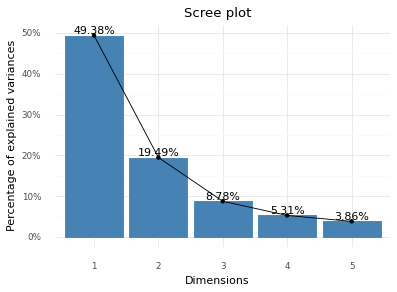

In [6]:
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(res_mfa,add_labels=True)
print(p)

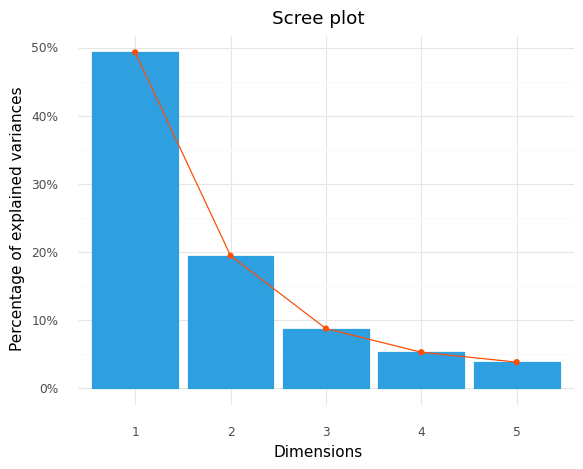

In [7]:
p = fviz_screeplot(res_mfa,line_color = "#FC4E07",bar_color = "#2E9FDF", bar_fill = "#2E9FDF")
print(p)

## Individuals Factor Map

### Color by RGB color

Index(['Dim.1', 'Dim.2', 'Dim.3', 'Dim.4', 'Dim.5', 'Label', 'Soil',
       'Odor.Intensity.before.shaking', 'Aroma.quality.before.shaking',
       'Fruity.before.shaking', 'Flower.before.shaking',
       'Spice.before.shaking', 'Visual.intensity', 'Nuance', 'Surface.feeling',
       'Odor.intensity', 'Quality.of.odour', 'Fruity', 'Flower', 'Spice',
       'Plante', 'Phenolic', 'Aroma.intensity', 'Aroma.persistency',
       'Aroma.quality', 'Attack.intensity', 'Acidity', 'Astringency',
       'Alcohol', 'Balance', 'Smooth', 'Bitterness', 'Intensity', 'Harmony',
       'Overall.quality', 'Typical'],
      dtype='object')


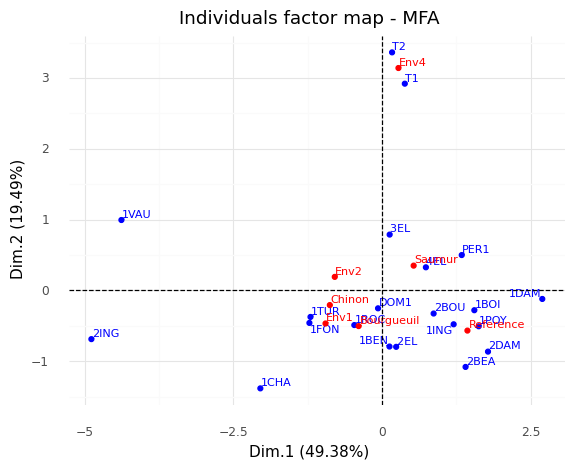

In [8]:
from scientisttools.ggplot import fviz_mfa_ind
p = fviz_mfa_ind(res_mfa,repel=True)
print(p)

### Color by cos2

In [9]:
p = fviz_mfa_ind(res_mfa,color="cos2",repel=True)
print(p)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

### Color by contrib

In [ ]:
p = fviz_mfa_ind(res_mfa,color="contrib",repel=True)
print(p)

### Color by actives quantitatives variables

In [ ]:
p = fviz_mfa_ind(res_mfa,color="Fruity",repel=True)
print(p)